## NLP stuff with Spotify User Reviews

Here we load, preprocess and explore Spotify user reviews to learn NLP preprocessing methods and gain first insights into the dataset.

In [18]:
## Setting to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [19]:
## Import general libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
## Read data and copy
spotify = pd.read_csv("../data/raw/spotify_review_kaggle.csv")
data_in = spotify.copy()

In [21]:
## Check Data
data_in.head(10)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
5,2022-07-09 13:20:20,The player controls sometimes disappear for no...,3,7,NaN
6,2022-07-09 13:19:21,I love the selection and the lyrics are provid...,5,0,NaN
7,2022-07-09 13:17:22,Still extremely slow when changing storage to ...,3,16,NaN
8,2022-07-09 13:16:49,It's a great app and the best mp3 music app I ...,5,0,NaN
9,2022-07-09 13:11:32,"I'm deleting this app, for the following reaso...",1,318,NaN


In [22]:
## Sample some reviews
data_in["Review"].sample(10)

19267    Been using spotify premium for a couple years ...
19271    This app is realy very fantastic i love the ap...
20667    They need to stop the app from automatically p...
55274    It's not perfect but what is. I like it best o...
23941    Outstanding!!!! I was a college radio DJ in th...
43906    Too many songs missing specially kannada and t...
54885    I enjoy that Spotify doesn't run my battery lo...
12019               I'm impressed with the amazing variety
59273    Latest update removed artist list from my musi...
16638    In one word the app is fantastic. But, I'm giv...
Name: Review, dtype: object

In [23]:
## Data info
data_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [25]:
## Remove duplicates
## Since we are changing the raw input data, let's change the name to data
print("Before dropping duplicates: ", len(data_in))
data = data_in.drop_duplicates(subset="Review")
print("After dropping duplicates: ", len(data))


Before dropping duplicates:  61594
After dropping duplicates:  61356


In [26]:
## Drop unused cols
data.drop(["Time_submitted", "Total_thumbsup", "Reply"], axis=1, inplace=True)
data.head(5)

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [43]:
## Ad col for reviews length of review in words
data["Length"] = data["Review"].str.split(" ").str.len()
data.head()

,Review,Rating,Length
0,"Great music service, the audio is high quality...",5,21
1,Please ignore previous negative rating. This a...,5,15
2,"This pop-up ""Get the best Spotify experience o...",4,19
3,Really buggy and terrible to use as of recently,1,9
4,Dear Spotify why do I get songs that I didn't ...,1,21


In [28]:
## Check shortest reviews
data.sort_values("Length").head(10)

,Review,Rating,Length
24628,Easy-to-use software,5,2
30670,"Powerful,Spirit-touching songs",5,2
27164,Best music service,5,3
4562,Always interrupts ads,1,3
4569,To many advertisement!!!,1,3
9923,Too much ads.,1,3
4572,Love no ads!,5,3
33635,Brilliant music app,5,3
9938,Full of adds,1,3
13112,Great and dynamic,5,3


In [30]:
## Check longest reviews
data.sort_values("Length").tail(10)

,Review,Rating,Length
61568,I have been using Spotify premium. Biggest dis...,3,150
24495,"SPOTIFY IS TERRIBLE! Before podcasts, Spotify ...",1,157
23836,"Works fine for my phone, however for the past ...",2,159
27916,Edit - came back to remove a star. Jesus cance...,2,165
19664,Spotify is a great way to listen to music alth...,4,175
40973,Although I like Spotify and I use it a lot (an...,3,185
26055,I am giving the 3 month free trial a go and so...,4,219
46004,"I am using Spotify soon for a year, before I u...",4,222
20489,"Attention Android Users: unfortunately, there ...",1,279
40566,"I very rarely leave reviews and if I do, they'...",1,699


<Figure size 1200x600 with 0 Axes>

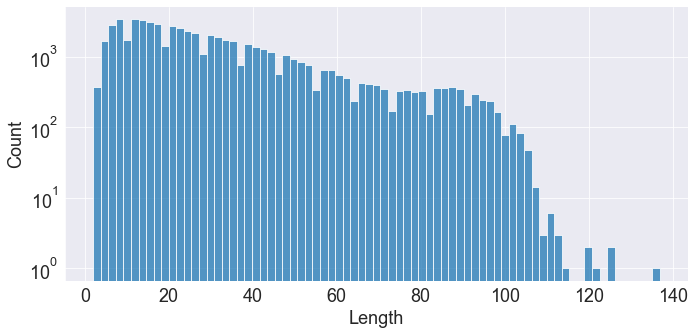

In [34]:
## Plot Review Length as hist
plt.figure(figsize=(4,2), dpi=300)
ax = sns.displot(data["Length"], kind="hist", fill=True, aspect=2, bins=75, log=True);

In [44]:
data["Length"].describe()

count    61346.000000
mean        30.957552
std         22.478166
min          2.000000
25%         14.000000
50%         25.000000
75%         42.000000
max        137.000000
Name: Length, dtype: float64

As we can see, most reviews are no longer than around 120 words; as a next step, we could remove all reviews with more than 150 words.

In [31]:
## Drop long reviews
data = data[data.Length < 150]
print("Number of reviews after trimming: ", len(data))

Number of reviews after trimming:  61346


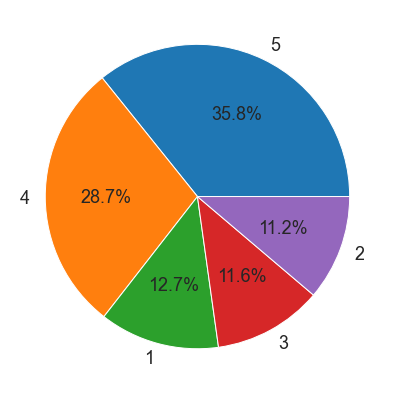

In [41]:
## Visualize distribution of ratings
plt.pie(data['Rating'].value_counts(), labels=data['Rating'].unique(), autopct='%1.1f%%')
plt.show()

In [ ]:
## Code sentiment from rating (1 or 2 == bad, 3 == neutral, 4 or 5 == good)

In [ ]:
## Plot sentiment distribution (e.g. sns.histplot)

In [ ]:
## Look for relationship between length and sentiment

### Preprocessing

In [54]:
## Import special libraries
import emojis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize as tokenizer

In [57]:
## Get NLTK english stopwords
our_stopwords = set(stopwords.words('english'))

In [ ]:
## 1. Lowercase
## 2. Remove Punct
## 3. Tokenize with standard tokenizer
## 4. Remove Stopw
## 5. ? Lemmatize ? 